In [3]:
import cv2
import sys
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(threshold=sys.maxsize)

In [18]:
data_path = '/Users/dnyanadajoshi/Dropbox/data/0624/NG_cropped/'
im_input = 'NG_1_cropped.bmp'
imfile = 'NG_1_checkmark_cropped.bmp'
crop_path = data_path+imfile[:-12]+'/'

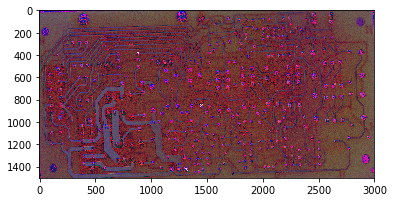

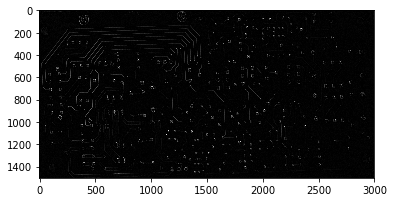

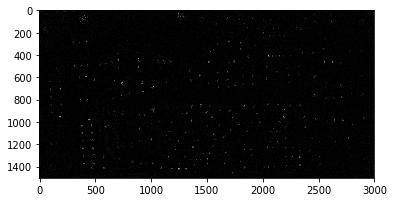

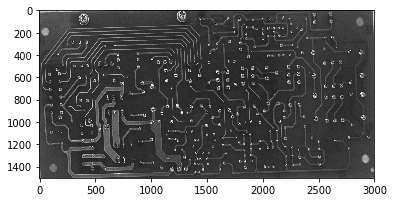

In [17]:
#Otsu segmentation on the Hue space
im_hsv = cv2.cvtColor(cv2.imread(data_path+imfile), cv2.COLOR_BGR2HSV_FULL)
plt.imshow(im_hsv)
plt.show()

#prefix = imfile[:-4]+"_offset"
#name = crop_path+prefix+"0_0_"+str(71)+".JPG"
#im_crop = cv2.cvtColor(cv2.imread(name), cv2.COLOR_BGR2HSV_FULL)
#print(im_crop[:,:,2])

#Thresholding by transition area
#tophat + original compared with blackhat
kernel = np.ones((7,7),np.uint8) 
img = cv2.imread(data_path+imfile, 0)
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

plt.imshow(tophat, cmap="gray")
plt.show()
plt.imshow(blackhat, cmap="gray")
plt.show()

addition = tophat + img
plt.imshow(addition, cmap="gray")
plt.show()



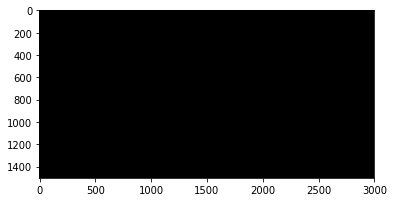

In [19]:
#Implementation of the Illumination paper.
img = cv2.imread(data_path+imfile, 0)      # 1 chan, grayscale!
imf = np.float32(img)//255.0  # float conversion/scale
dst = cv2.dct(imf)           # the dct
img = np.uint8(dst)*255.0 

plt.imshow(img, cmap="gray")
plt.show()

In [20]:
im_marked = cv2.imread(data_path+imfile)
im_in = cv2.imread(data_path+im_input)
blob = cv2.SimpleBlobDetector_create()
keypoints = blob.detect(im_marked)
print(keypoints[0].pt)
im_with_keypoints = cv2.drawKeypoints(im_marked, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

(453.26263427734375, 985.867919921875)


In [23]:
def remove_noise(img):
    img = 255 - img 
    kernel = np.ones((3,3),np.float32)
    kernel[1][1] = 0
    dst =cv2.filter2D(img,-1,kernel)
    dst = 255 - dst
    return dst

In [21]:
#Single cropped image:
prefix = imfile[:-4]+"_offset"
name = crop_path+prefix+"0_0_"+str(71)+".JPG"

im = cv2.imread(name,0)
im = 255 - remove_noise(im)
plt.imshow(im)
plt.show()
#resized = cv2.resize(im, (im.shape[0]//10,im.shape[1]//10))
#im = cv2.resize(resized, (im.shape[0],im.shape[1]))
im = cv2.GaussianBlur(im, (3, 3), 0)
blob = cv2.SimpleBlobDetector_create()
plt.imshow(im)
plt.show()
#help(type(blob))
keypoints = blob.detect(im)

im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(im_with_keypoints)
plt.show()

NameError: name 'remove_noise' is not defined

In [18]:
cv2.imwrite(data_path+'Blobs.JPG', im_with_keypoints)

True

In [22]:
def draw_grid(img, line_color=(0, 255, 0), thickness=1, type_= cv2.LINE_AA, pxstep=60, incrx=0, incry=0):
    '''(ndarray, 3-tuple, int, int) -> void
    draw gridlines on img
    line_color:
        BGR representation of colour
    thickness:
        line thickness
    type:
        8, 4 or cv2.LINE_AA
    pxstep:
        grid line frequency in pixels
    '''
    x = pxstep
    y = pxstep
    while x < img.shape[1]:
        cv2.line(img, (x+incrx, 0), (x+incrx, img.shape[0]), color=line_color, lineType=type_, thickness=thickness)
        x += pxstep

    while y < img.shape[0]:
        cv2.line(img, (0, y+incry), (img.shape[1], y+incry), color=line_color, lineType=type_, thickness=thickness)
        y += pxstep
        
    return img

In [23]:
draw_grid(im_marked)
draw_grid(im_marked, line_color = (255,0,0), incrx=0, incry=0)
cv2.imwrite(data_path+"grid2.JPG", im_marked)
draw_grid(im_in)
draw_grid(im_in, line_color = (255,0,0), incrx=0, incry=0)
cv2.imwrite(data_path+"grid1.JPG", im_in)

True